## Count tracks

I want to understand what the denominator is for different datasets. 

Files: 

`/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00050440.root`

`/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00012335.root`

`/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CeEndpointOnSpillTriggered.MDC2020aq_best_v1_3_v06_03_00.001210_00000699.root`

Questions:

1. how many primaries per event
2. how many track parents per event
3. how many e- tracks per event

Ramblings:

If I have a set of events with CE-like tracks, do I just normalise by the total number of events? I don't think so. I think we either need to count actual number of track parents, although this relies on truth, or the number of assumed electron fits. It gets slightly confusing because we do implement a cut on multiple electron tracks, so doesn't that bias the normalisation??? Also, CRY has multiple cosmics per event.


## Get data

In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

from pyutils.pyvector import Vector
from pyutils.pyprocess import Processor
from pyutils.pyplot import Plot
from pyutils.pyprint import Print
from pyutils.pyselect import Select 

In [2]:
processor = Processor(verbosity=1)

[pyprocess] ⭐️ Initialised Processor:
	path = 'EventNtuple/ntuple'
	use_remote = False
	verbosity=1


In [3]:
branches = {
    "trk" : [ "trk.pdg", "trkqual.valid", "trkqual.result"],
    "trkmc" : "trkmcsim",
    "trkfit" : "trksegs"
}

data = {} 

data["offspill"] = processor.process_data(
    file_name = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00050440.root",
    branches = branches
)

data["onspill"] = processor.process_data(
    file_name = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00012335.root",
    branches = branches
)

data["signal"] = processor.process_data(
    file_name = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CeEndpointOnSpillTriggered.MDC2020aq_best_v1_3_v06_03_00.001210_00000699.root", 
    branches = branches
)

[pyread] ✅ Opened /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00050440.root
[pyimport] ✅ Imported branches
[pyprocess] ✅ Returning result from process on /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00050440.root
[pyread] ✅ Opened /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00012335.root
[pyimport] ✅ Imported branches
[pyprocess] ✅ Returning result from process on /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00012335.root
[pyread] ✅ Opened /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/data/nts.mu2e.CeEndpointOnSpillTriggered.MDC2020aq_best_v1_3_v06_03_00.001210_00000699.root
[pyimport] ✅ Imported branches
[pyprocess] ✅ Returning result from pro

In [4]:
data # data = { "signal" : signal, "offspill" : offspill, "onspill" : onspill } 

{'offspill': <Array [{trk: {...}, trkmc: {...}, ...}, ...] type='6932 * {trk: {"trk.pdg"...'>,
 'onspill': <Array [{trk: {...}, trkmc: {...}, ...}, ...] type='2653 * {trk: {"trk.pdg"...'>,
 'signal': <Array [{trk: {...}, trkmc: {...}, ...}, ...] type='1471 * {trk: {"trk.pdg"...'>}

In [5]:
printer = Print()
printer.print_n_events(data["signal"])

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
trk.trk.pdg: [11, -11, 13, -13]
trk.trkqual.valid: [True, True, True, True]
trk.trkqual.result: [0.847, 0.123, 0.817, 0.0381]
trkmc.trkmcsim.valid: [[True, True, True, True], [True, ..., True], ..., [True, True, True, True]]
trkmc.trkmcsim.id: [[4, 2, 1, 0], [4, 2, 1, 0], [4, 2, 1, 0], [4, 2, 1, 0]]
trkmc.trkmcsim.nhits: [[35, -1, -1, -1], [35, -1, -1, -1], [35, -1, ..., -1], [35, -1, -1, -1]]
trkmc.trkmcsim.nactive: [[35, -1, -1, -1], [33, -1, -1, -1], [35, -1, ..., -1], [31, -1, -1, -1]]
trkmc.trkmcsim.rank: [[0, -1, -1, -1], [0, -1, -1, -1], [0, -1, -1, -1], [0, -1, -1, -1]]
trkmc.trkmcsim.pdg: [[11, 13, -211, 2212], [11, 13, -211, 2212], [...], [11, 13, -211, 2212]]
trkmc.trkmcsim.startCode: [[167, 14, 101, 56], [167, 14, 101, 56], [167, ...], [167, 14, 101, 56]]
trkmc.trkmcsim.stopCode: [[17

In [6]:
# Filter reco electron fits, I think this is essential since there are always four track fits 
selector = Select(verbosity=0)
for name, array in data.items():
    is_electron = selector.is_electron(array["trk"])
    data[name] = data[name][is_electron]

# Primaries / event 

In [7]:
vector = Vector(verbosity=0)
def is_parent(array): 
    # Rank condition
    rank_condition = array["trkmc"]["trkmcsim"]["rank"] == -1
    # Momentum condition
    mom_mag = vector.get_mag(array["trkmc"]["trkmcsim"], "mom")
    mom_condition = mom_mag == ak.max(mom_mag, axis=-1)
    # Combine and return 
    return (rank_condition & mom_condition)


# Count primaries
for name, array in data.items():
    # Mark them
    data[name]["is_primary"] = is_parent(array)
    # Count them 
    data[name]["n_primaries"] = ak.sum(data[name]["is_primary"], axis=-1) 
    mean = np.mean(ak.flatten(data[name]["n_primaries"], axis=None))
    print(f"Mean number of primaries for {name}: {mean:.2f}")
print()

Mean number of primaries for offspill: 1.52
Mean number of primaries for onspill: 1.33
Mean number of primaries for signal: 1.00



## Track parents / event 

In [8]:
for name, array in data.items():
    is_electron = array["trkmc"]["trkmcsim"]["pdg"] == 11
    is_trk_parent = array["trkmc"]["trkmcsim"]["nhits"] == ak.max(array["trkmc"]["trkmcsim"]["nhits"], axis=-1)

    # Mark them
    data[name]["is_trk_parent_electron"] = is_electron & is_trk_parent 
    # Count them 
    data[name]["is_trk_parent_electron"] = ak.sum(data[name]["is_trk_parent_electron"], axis=-1) 
    mean = np.mean(ak.flatten(data[name]["is_trk_parent_electron"], axis=None))
    print(f"Mean number of primaries for {name}: {mean:.2f}")
print()

# plot
plotter = Plot()


Mean number of primaries for offspill: 0.43
Mean number of primaries for onspill: 0.27
Mean number of primaries for signal: 1.00

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


## Candidate electron tracks / event 

In [9]:
for name, array in data.items():
    data[name]["n_candidate_electrons"] = ak.count(data[name]["trk"]["trk.pdg"], axis=-1) 
    mean = np.mean(ak.flatten(data[name]["n_candidate_electrons"], axis=None))
    print(f"Mean number of candidate electrons for {name}: {mean:.2f}")
print()



# printer.print_n_events(data["signal"])

# ak.flatten(data[name]["n_primaries"], axis=None)

Mean number of candidate electrons for offspill: 1.32
Mean number of candidate electrons for onspill: 1.19
Mean number of candidate electrons for signal: 1.00



## Quality electron tracks / event 

In [10]:
# Count primaries
for name, array in data.items():
    # Mark them 
    data[name]["good_electron"] = selector.select_trkqual(data[name]["trk"], quality=0.8)
    # # Count them
    data[name]["n_good_electrons"] = ak.sum(data[name]["good_electron"], axis=-1) 
    mean = np.mean(ak.flatten(data[name]["n_good_electrons"], axis=None))
    print(f"Mean number of good electrons for {name}: {mean:.2f}")
print()

# plot

# printer.print_n_events(data["signal"])

# ak.flatten(data[name]["n_primaries"], axis=None)

Mean number of good electrons for offspill: 0.19
Mean number of good electrons for onspill: 0.19
Mean number of good electrons for signal: 0.52



## Plot everything 

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


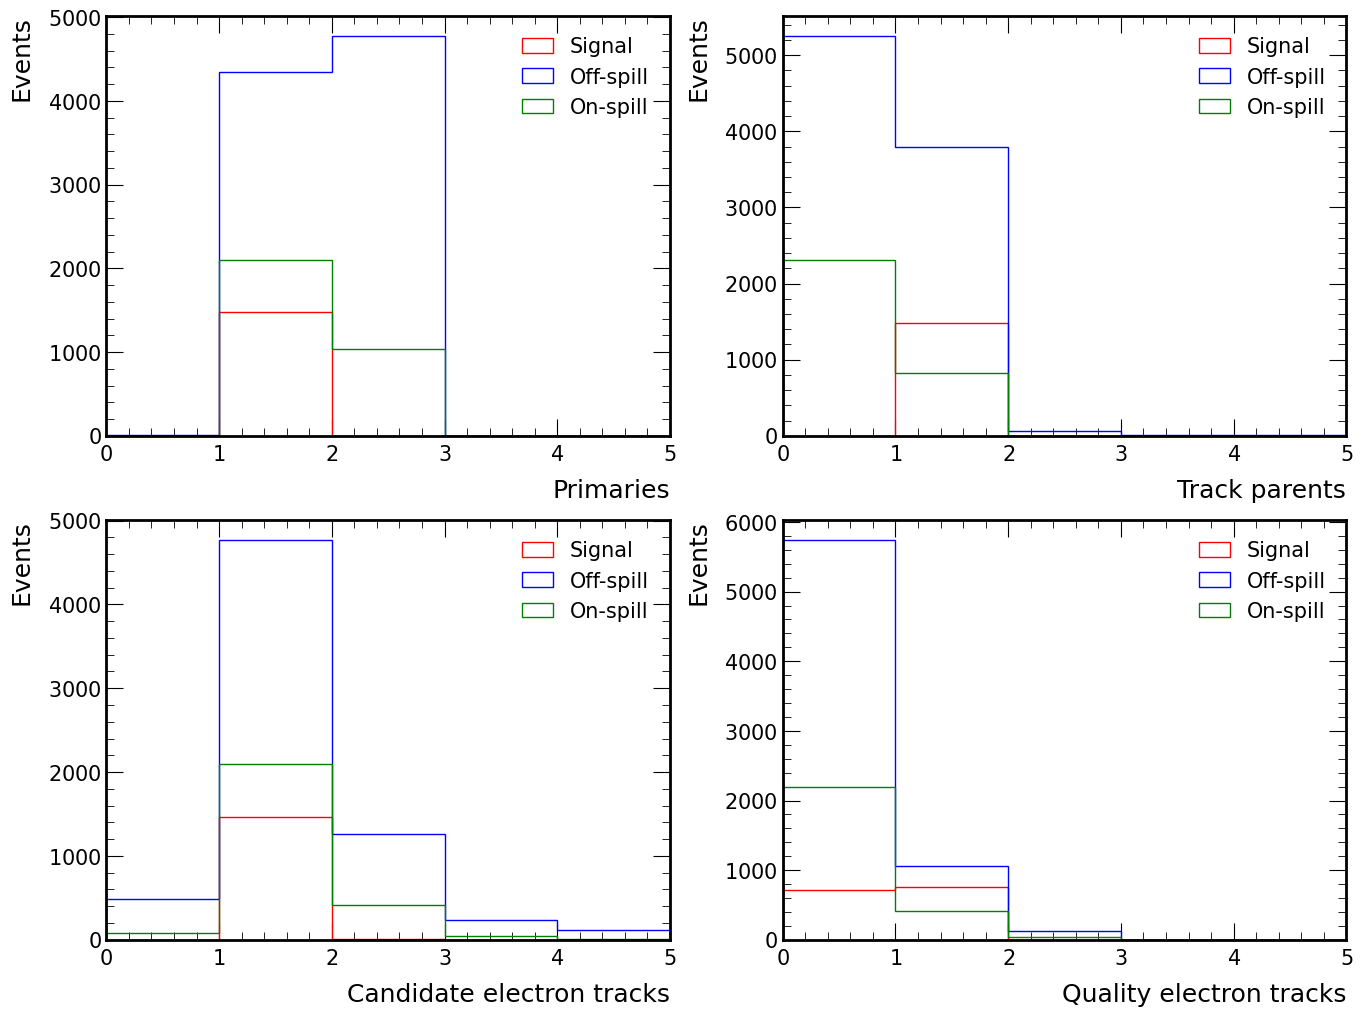

In [11]:

fig, ax = plt.subplots(2, 2, figsize=(8*2, 6*2))

# plot
plotter = Plot()
plotter.plot_1D_overlay(
    { "Signal" : ak.flatten(data["signal"]["n_primaries"], axis=None),
      "Off-spill" : ak.flatten(data["offspill"]["n_primaries"], axis=None),
      "On-spill" : ak.flatten(data["onspill"]["n_primaries"], axis=None)
    },
    nbins=5,
    xmin=0,
    xmax=5,
    xlabel="Primaries",
    ylabel="Events",
    show=False,
    # out_path="../../img/comp/h1o_primaries_per_event.png",
    ax=ax[0,0]
    
)

plotter.plot_1D_overlay(
    { "Signal" : ak.flatten(data["signal"]["is_trk_parent_electron"], axis=None),
      "Off-spill" : ak.flatten(data["offspill"]["is_trk_parent_electron"], axis=None),
      "On-spill" : ak.flatten(data["onspill"]["is_trk_parent_electron"], axis=None)
    },
    nbins=5,
    xmin=0,
    xmax=5,
    xlabel="Track parents",
    ylabel="Events",
    # out_path="../../img/comp/h1o_track_parents_per_event.png"
    show=False,
    # out_path="../../img/comp/h1o_primaries_per_event.png",
    ax=ax[0,1]
)

# plot
plotter.plot_1D_overlay(
    { "Signal" : ak.flatten(data["signal"]["n_candidate_electrons"], axis=None),
      "Off-spill" : ak.flatten(data["offspill"]["n_candidate_electrons"], axis=None),
      "On-spill" : ak.flatten(data["onspill"]["n_candidate_electrons"], axis=None)
    },
    nbins=5,
    xmin=0,
    xmax=5,
    xlabel="Candidate electron tracks",
    ylabel="Events",
    # out_path="../../img/comp/h1o_track_candidates_per_event.png"
    show=False,
    # out_path="../../img/comp/h1o_primaries_per_event.png",
    ax=ax[1,0]
)

plotter.plot_1D_overlay(
    { "Signal" : ak.flatten(data["signal"]["n_good_electrons"], axis=None),
      "Off-spill" : ak.flatten(data["offspill"]["n_good_electrons"], axis=None),
      "On-spill" : ak.flatten(data["onspill"]["n_good_electrons"], axis=None)
    },
    nbins=5,
    xmin=0,
    xmax=5,
    xlabel="Quality electron tracks",
    ylabel="Events",
    # out_path="../../img/comp/h1o_quality_tracks_per_event.png"
    show=False,
    # out_path="../../img/comp/h1o_primaries_per_event.png",
    ax=ax[1,1]
)

plt.savefig("../../img/comp/h1o_counts_per_event.png", dpi=300)